In [49]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,6)})

In [3]:
df_sh = pd.read_csv('PRSA_Data_Shunyi.csv')
df_wa = pd.read_csv('PRSA_Data_Wanliu.csv')
df_gu = pd.read_csv('PRSA_Data_Gucheng.csv')

In [10]:
df_sh['year_month_day_hour'] = pd.to_datetime(df_sh[['year','month','day','hour']])
df_sh = df_sh.drop(['year','month','day','hour'],axis=1)

df_wa['year_month_day_hour'] = pd.to_datetime(df_wa[['year','month','day','hour']])
df_wa = df_wa.drop(['year','month','day','hour'],axis=1)

df_gu['year_month_day_hour'] = pd.to_datetime(df_gu[['year','month','day','hour']])
df_gu = df_gu.drop(['year','month','day','hour'],axis=1)

In [22]:
## concating the data frames
## here data frame concant one after another mean after 35064 rows then next df  
df = pd.concat([df_sh,df_wa,df_gu],ignore_index=True,sort=False)

df = df.drop(['No'],axis=1)

In [23]:
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,year_month_day_hour
0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi,2013-03-01 00:00:00
1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi,2013-03-01 01:00:00
2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi,2013-03-01 02:00:00
3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi,2013-03-01 03:00:00
4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi,2013-03-01 04:00:00


In [28]:
## Here we sampling the data with Day level 
## but we also doing the groupby by station because if we do not do this 
## we do not get data for seprate we get data by considration of one feature

df = df.set_index('year_month_day_hour').groupby('station').resample('D').mean()

In [32]:
df.head()

PM2.5        PM10        SO2        NO2  \
station year_month_day_hour                                                 
Gucheng 2013-03-01             8.625000   16.875000   7.391304  14.250000   
        2013-03-02            36.916667   51.375000  37.291667  37.565217   
        2013-03-03            80.333333  120.041667  47.541667  63.333333   
        2013-03-04            26.500000   51.291667  18.666667  32.666667   
        2013-03-05           136.708333  172.541667  75.130435  73.500000   

                                      CO         O3      TEMP         PRES  \
station year_month_day_hour                                                  
Gucheng 2013-03-01            869.565217  77.130435  1.691667  1024.816667   
        2013-03-02           1479.041667  39.583333  0.820833  1024.900000   
        2013-03-03           2349.708333  33.708333  6.562500  1012.566667   
        2013-03-04           1170.666667  67.250000  9.795833  1015.608333   
        2013-03-05           1381.545455  84.375000  6.750000  1008.883333   

                                  DEWP  RAIN      WSPM  
station year_month_day_hour                             
Gucheng 2013-03-01          -19.691667   0.0  2.350000  
        2013-03-02          -16.337500   0.0  1.087500  
        2013-03-03          -11.991667   0.0  1.400000  
        2013-03-04          -11.945833   0.0  1.541667  
        2013-03-05           -7.741667   0.0  0.841667

In [33]:
df = df.reset_index()

In [39]:
df.station.unique()

array(['Gucheng', 'Shunyi', 'Wanliu'], dtype=object)

### Here we working with O3 and Temp column

station
Gucheng    AxesSubplot(0.125,0.125;0.775x0.755)
Shunyi     AxesSubplot(0.125,0.125;0.775x0.755)
Wanliu     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

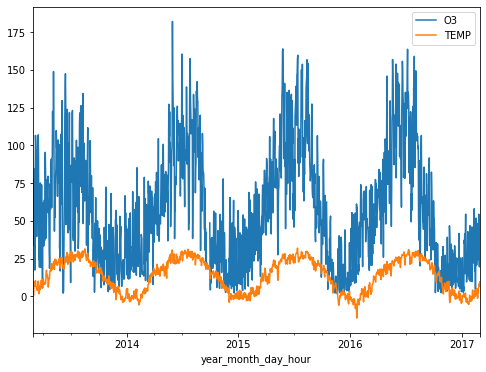

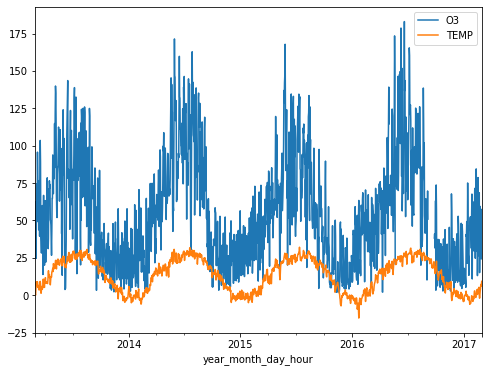

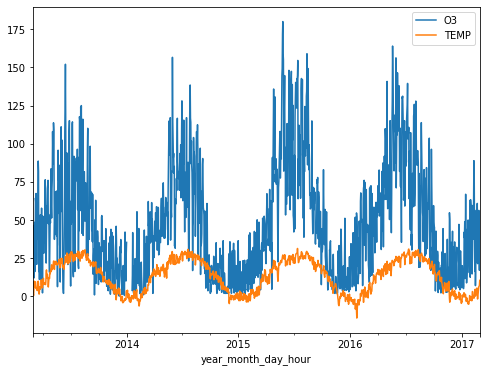

In [57]:
#df.set_index('year_month_day_hour').query("station == 'Gucheng'")[['O3','TEMP']].plot()
#df.set_index('year_month_day_hour').query("station == 'Wanliu'")[['O3','TEMP']].plot()
#df.set_index('year_month_day_hour').query("station == 'Shunyi'")[['O3','TEMP']].plot()
df.set_index('year_month_day_hour').groupby('station')[['O3','TEMP']].plot()

In [56]:
## here we can see there is some seasonality pattern 
## as temp increse the O3 also increse
## but there is some difference on the data with these time series so we need to create multiple model for it
## we can not create one model for all

In [58]:
# Model
from fbprophet import Prophet

In [59]:
renamed_df = df[['year_month_day_hour','O3','TEMP','station']].rename({'year_month_day_hour':'ds','O3':'y'},axis=1)

In [64]:
stations = renamed_df.groupby('station')
stations.head()

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
1461,2013-03-01,62.478261,0.541667,Shunyi
1462,2013-03-02,40.416667,0.083333,Shunyi
1463,2013-03-03,24.541667,5.029167,Shunyi
1464,2013-03-04,55.125000,8.937500,Shunyi
1465,2013-03-05,74.541667,6.450000,Shunyi


In [65]:
## empty data frame because we cbuild different forecast from different stations
target = pd.DataFrame()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


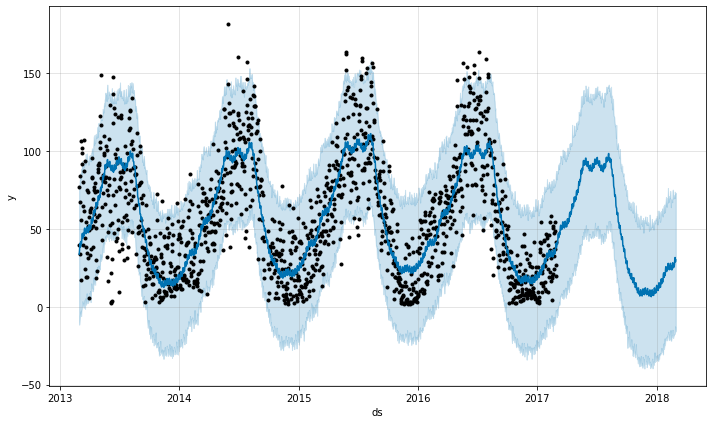

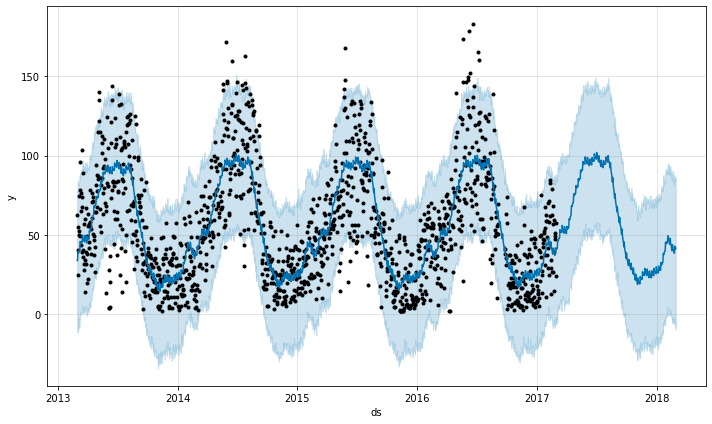

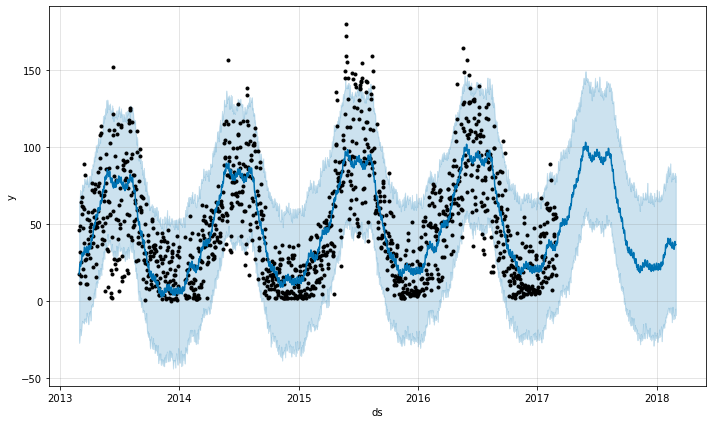

In [72]:
for station in stations.groups:
    group = stations.get_group(station)
    
    model = Prophet(interval_width=0.95)
    model.fit(group)
    
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)
    
    model.plot(forecast)
    
    forecast = forecast.rename(columns={'yhat':'yhat_'+station})
    
    target = pd.merge(target,forecast.set_index('ds') , how='outer' , left_index=True , right_index=True)
    

In [74]:
target = target[['yhat_'+station for station in stations.groups.keys()]]

In [75]:
target

,yhat_Gucheng,yhat_Shunyi,yhat_Wanliu
ds,,,
2013-03-01,33.860251,33.883649,17.666978
2013-03-02,35.941907,34.220287,20.007029
2013-03-03,39.722176,39.381665,23.830223
2013-03-04,40.989854,38.852346,24.345201
2013-03-05,38.377386,38.503407,22.495485
...,...,...,...
2018-02-24,27.268383,38.517924,35.405110
2018-02-25,30.710081,43.039709,38.660443
2018-02-26,31.695071,41.936177,38.671792


<AxesSubplot:xlabel='ds'>

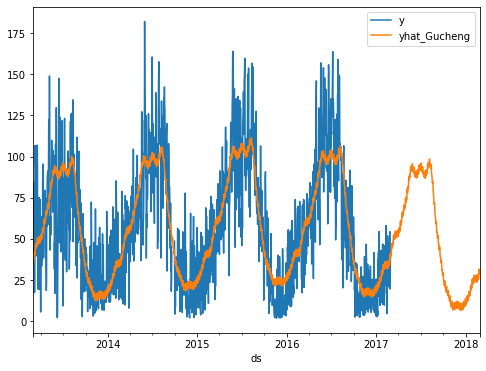

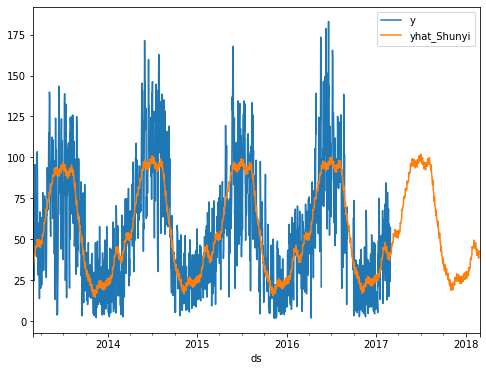

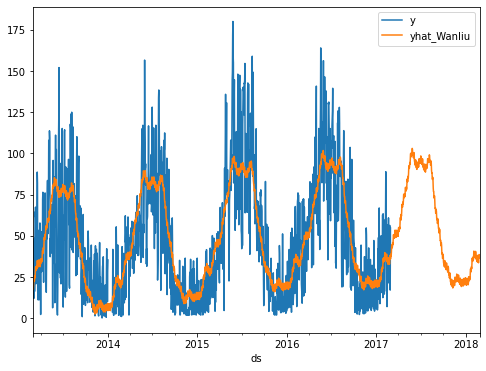

In [78]:
pd.concat([renamed_df.set_index('ds').query("station=='Gucheng'")['y'] , target['yhat_Gucheng']],axis=1).plot()
pd.concat([renamed_df.set_index('ds').query("station=='Shunyi'")['y'] , target['yhat_Shunyi']],axis=1).plot()
pd.concat([renamed_df.set_index('ds').query("station=='Wanliu'")['y'] , target['yhat_Wanliu']],axis=1).plot()

<AxesSubplot:xlabel='ds'>

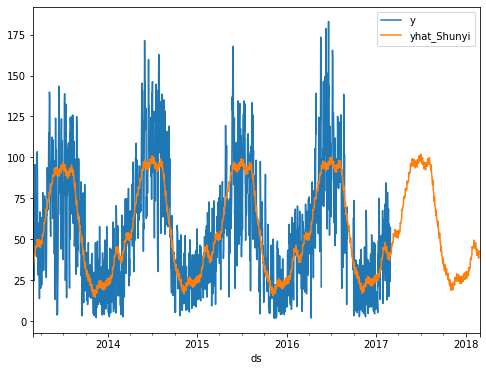